<h1><p style="text-align: center;">Project 2: AI for Global Health using Natural Language Processing</p></h1>

<p style="text-align: center;">Sven Gutjahr, Christian Bertsch, Richard Danis.</p>

### Imports

In [1]:
import nltk
import pandas as pd
import matplotlib.pyplot as plt
import string
import re
import preprocessing as p

### Part 1: Data pre-processing

Describes the methods used to get the dataset: https://data.gesis.org/tweetskb/

In [2]:
# loading raw data
raw_data = pd.read_csv('data/TweetsCOV19.csv')
# loading data with preprocessed tweets
data = pd.read_csv('data/cleaned_tweets.csv')

/tmp/ipykernel_51403/3145232326.py:2: DtypeWarning: Columns (0,1) have mixed types. Specify dtype option on import or set low_memory=False.
  raw_data = pd.read_csv('data/TweetsCOV19.csv')


In [4]:
raw_data.columns

Index(['Unnamed: 0', 'TweetId', 'Username', 'Timestamp', 'NoFollowers',
       'NoFriends', 'NoRetweets', 'NoFavorites', 'Entities', 'Sentiment',
       'Mentions', 'Hashtags', 'URLs', 'TweetText', 'UserLocation'],
      dtype='object')

In [5]:
# structure of the data
raw_data.head(1)

,Unnamed: 0,TweetId,Username,Timestamp,NoFollowers,NoFriends,NoRetweets,NoFavorites,Entities,Sentiment,Mentions,Hashtags,URLs,TweetText,UserLocation
0,0,1178793230223183872,bf05d1888dd974fa4a8679c25e2ead03,2019-09-30 22:06:21+00:00,5018.0,1933.0,0.0,0.0,vaccine:Vaccine:-2.6651530673745762;anti vaxxe...,2 -1,null;,null;,https://goo.gl/fb/uoeiPk:-:,From my blog: Californians support vaccine law...,"Los Angeles, CA"


In [6]:
# display whole content of each column
pd.set_option('display.max_colwidth', None)

# displaying first 10 tweets
print(raw_data['TweetText'][:10])

0                                   From my blog: Californians support vaccine laws – new poll diminishes anti-vaxxer power https://t.co/d5BaAda3ki
1     Secretary of State should recall Stormont next Monday at 10am.\nThose MLA’s who refuse to turn up (Whatever Party) s… https://t.co/ZdArVTrKar
2      While serving in Afghanistan in 2010, Marine Corporal Brandon Rumbaug was carrying a fellow Marine to safety when h… https://t.co/Dipa5CbN1A
3      witch vixen season starts tomorrow. you all should be receiving the spell that turns you into your witchsona at mid… https://t.co/ruYcgfoSdI
4    CGTN on the scene: \n\nAround 15,000 troops, 32 equipment units and 12 air formations composed of over 160 aircraft a… https://t.co/btVQ5kDgAQ
5      Looking like it may be a fall-like weekend coming up! Dry cold front looks to move through the area Friday with hig… https://t.co/qOyZm9sS2B
6                                           i stopped caring what niggas think when i realized they will believe

In [3]:
print(data['TweetText'][:10])

0    from my blog californian support vaccine law –...
1    secretary of state should recall stormont next...
2    while serving in afghanistan in 2010 marine co...
3    witch vixen season start tomorrow you all shou...
4    cgtn on the scene around 15000 troop 32 equipm...
5    looking like it may be a falllike weekend comi...
6    i stopped caring what nigga think when i reali...
7    live chaos expected on oct 1 across hong kong ...
8    i hold kievstheworld personally responsible fo...
9                                 fuckitripped exactly
Name: TweetText, dtype: object


In [3]:
# takes 4 minutes on my laptop
tweets = data['TweetText'].tolist()
tokenized_tweets = p.tokenization(tweets)

In [4]:
def ngram_freq(tweets, n):

    ngrams = dict()

    for tweet in tweets:
        for i in range(len(tweet)-n + 1):
            if tuple(tweet[i:i+n]) in ngrams:
                ngrams[tuple(tweet[i:i+n])] += 1
            else:
                ngrams[tuple(tweet[i:i+n])] = 1

    ngrams = sorted(ngrams.items(), key=lambda x:-x[1])

    return ngrams

In [5]:
unigrams = ngram_freq(tokenized_tweets, 1)

In [6]:
raw_data = raw_data[raw_data['TweetText'].notnull()]

In [7]:
# takes 7 minutes on my laptop
raw_tweets = raw_data['TweetText'].tolist()
raw_tokenized_tweets = p.tokenization(raw_tweets)

In [8]:
raw_unigrams = ngram_freq(raw_tokenized_tweets, 1)
raw_bigrams = ngram_freq(raw_tokenized_tweets, 2)
bigrams = ngram_freq(tokenized_tweets, 2)

In [9]:
pos = [i for i in range(10)]

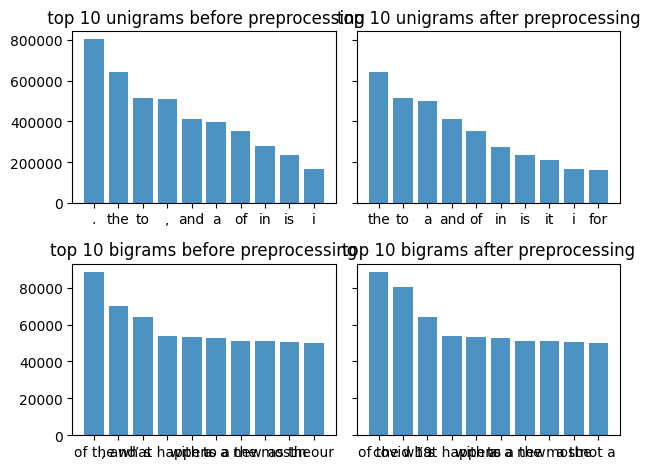

: 

In [15]:
fig, ax = plt.subplots(2, 2, sharey='row')

titles = [' top 10 unigrams before preprocessing', 'top 10 unigrams after preprocessing', 'top 10 bigrams before preprocessing', 'top 10 bigrams after preprocessing']
grams = [raw_unigrams, unigrams, raw_bigrams, bigrams]

for i, (title, gram) in enumerate(zip(titles, grams)):

    words = [gram[j][0][0] for j in range(10)]
    if i > 1:
        words = [' '.join(gram[j][0]) for j in range(10)]
    freq = [gram[j][1] for j in range(10)]

    font {'fontsize': rcParams['axes.titlesize'],
    'fontweight' : rcParams['axes.titleweight'],
    'verticalalignment': 'baseline',
    'horizontalalignment': loc}

    ax[i//2][i % 2].bar(pos, freq, align='center', alpha=0.8)
    ax[i//2][i % 2].set_xticks(pos)
    ax[i//2][i % 2].set_xticklabels(words)
    ax[i//2][i % 2].set_title(title)

plt.tight_layout()
plt.show()